In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("C://Users//ahmed//Desktop//Housing.csv")

In [5]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [7]:
X = df_encoded.drop("price", axis=1)
y = df_encoded["price"]


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [13]:
y_pred = model.predict(X_test)

In [15]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [17]:
print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print(f"Mean Squared Error (MSE): {mse:,.2f}")
print(f"R-squared (R²): {r2:.4f}")


Model Evaluation Metrics:
Mean Absolute Error (MAE): 970,043.40
Mean Squared Error (MSE): 1,754,318,687,330.66
R-squared (R²): 0.6529


In [19]:
coefficients = pd.Series(model.coef_, index=X.columns)
print("\nModel Coefficients:")
print(coefficients.sort_values(ascending=False))


Model Coefficients:
bathrooms                          1.094445e+06
airconditioning_yes                7.914267e+05
hotwaterheating_yes                6.846499e+05
prefarea_yes                       6.298906e+05
stories                            4.074766e+05
basement_yes                       3.902512e+05
mainroad_yes                       3.679199e+05
guestroom_yes                      2.316100e+05
parking                            2.248419e+05
bedrooms                           7.677870e+04
area                               2.359688e+02
furnishingstatus_semi-furnished   -1.268818e+05
furnishingstatus_unfurnished      -4.136451e+05
dtype: float64


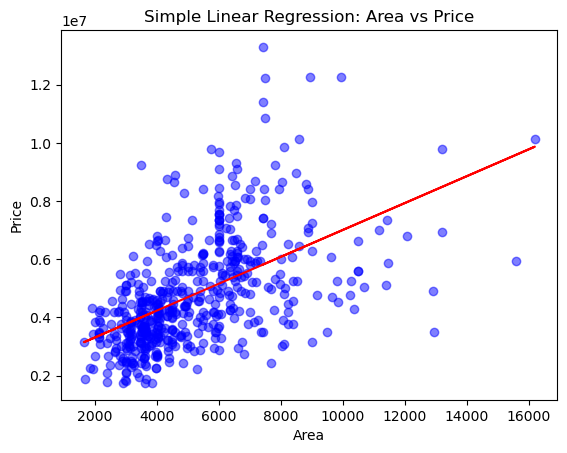

In [21]:
plt.scatter(df["area"], df["price"], color='blue', alpha=0.5)
simple_model = LinearRegression()
simple_model.fit(df[["area"]], df["price"])
plt.plot(df["area"], simple_model.predict(df[["area"]]), color='red')
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Simple Linear Regression: Area vs Price")
plt.show()